In [2]:
# Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# View data
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# View index
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<b> Adjusting our dataset frequency value into 'MS' (*monthly start*).

In [5]:
# Adjusting airline index as'MS'
airline.index.frequency = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

If still not changed, use `.asfreq()`.<br>

As below :

In [6]:
# Merubah frequency dengan .asfreq()
airline = airline.asfreq('MS')
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

View our dataset

In [7]:
# Melihat info dari tabel airline
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Split Training Set vs Test Set

<b> Our dataset consist of 144 rows (starting from January 1st 1949 towards December 1st 1960).

<b> We use 80 : 20 ratio for splitting train set vs test set, with 80% of dataset will be classified as Training Set and the remaining 20% as Test Set. <br>
    
<b> Training Set = 80% * 144 = 116 rows ( first row up to 116th row )
    
<b> Test Set = 28 rows (last 28 rows of the dataset)

In [8]:
# Split data into training set and test set 
train = airline.iloc[:116]
test = airline.iloc[116:]

In [12]:
# See train data
train.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
# Last row of training data
train.tail()

,Thousands of Passengers
Month,
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505


In [14]:
# See test data
test.head()

,Thousands of Passengers
Month,
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360


#### We can see that there is no *overlap* between *training* and *test* set.

#### The end date of *training set* is 1 August 1958, while the starting date of *test set* is 1 September 1958.

In [18]:
# See total row numbers of both train and test set
print(train.shape)
print(test.shape)

(116, 1)
(28, 1)


Next, we will try to visualize the dataset split.

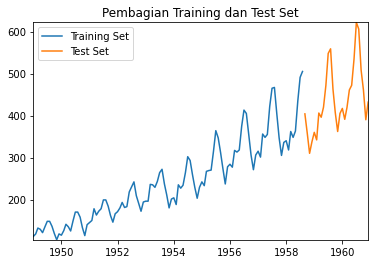

In [20]:
# Visualization of training set & test set
plt.title('Pembagian Training dan Test Set')
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.autoscale(axis='both', tight=True)
plt.legend();

<b> Now we will try to construct DES and TES model on the *training set*, and then evaluate the performance in the *test set*

In [21]:
# Importing library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
# Creating model (we use 'mul' for both model)
model_des = ExponentialSmoothing(train['Thousands of Passengers'], trend='add').fit()
model_tes = ExponentialSmoothing(train['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [23]:
# We will try to run prediction (forecast) as much as the next 28 time periode (row numbers in data set)
pred_des = model_des.forecast(28)
pred_tes = model_tes.forecast(28)

In [25]:
# See prediction from DES model
pred_des.head()

1958-09-01    508.417398
1958-10-01    511.834796
1958-11-01    515.252194
1958-12-01    518.669592
1959-01-01    522.086989
Freq: MS, dtype: float64

In [26]:
# See prediction from TES model
pred_tes.head()

1958-09-01    412.692305
1958-10-01    356.135333
1958-11-01    316.829852
1958-12-01    351.667022
1959-01-01    360.299868
Freq: MS, dtype: float64

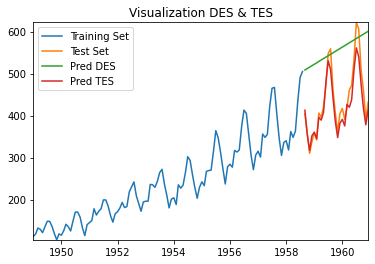

In [28]:
# We create visualization on all models
plt.title('Visualization DES & TES')
plt.plot(train, label='Training Set')
plt.plot(test, label='Test Set')
plt.plot(pred_des, label='Pred DES')
plt.plot(pred_tes, label='Pred TES')
plt.autoscale(axis='both', tight=True)
plt.legend();

<b> We can see that TES model (red line) has more similarity with *test set* compare to DES model.

<b> Now we can evaluate using several *forecasting* metrics.

In [29]:
# Importing library for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
# See MAE (Mean Absolute Error) score of both model
print(f'MAE DES = {round(mean_absolute_error(test, pred_des), 2)}')
print(f'MAE TES = {round(mean_absolute_error(test, pred_tes), 2)}')

MAE DES = 121.97
MAE TES = 21.55


In [33]:
# See MSE (Mean Squared Error) score of both model
print(f'MSE DES = {round(mean_squared_error(test, pred_des),2)}')
print(f'MSE TES = {round(mean_squared_error(test, pred_tes),2)}')

MSE DES = 18207.68
MSE TES = 756.74


<b> Lower MAE and MSE score is better, meaning the model's predictions are closer to the actual values.

<b> We can see from both *Mean Absolute Error* (MAE) and *Mean Squared Error* (MSE) score that TES model is better (lower than DES)

## Use TES (Triple Exponential Smoothing) model

### Based on MAE and MSE score above, we conculde that TES model is better.

### Therefore, we will use TES for final prediction. 

### Final prediction can be done by doing *retraining* process using whole/full dataset. Not splitted.

In [37]:
# Training full / whole dataset
model_final = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [45]:
# Prediction 12 time period forward (One year ahead)
pred_final = model_final.forecast(12)

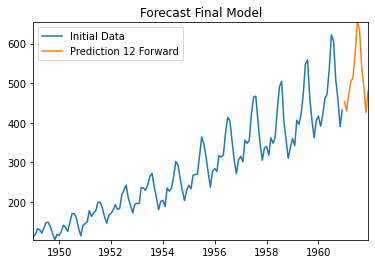

In [49]:
# Visualize all
plt.title('Forecast Final Model')
plt.plot(airline, label='Initial Data')
plt.plot(pred_final, label='Prediction 12 Forward')
plt.autoscale(axis='both', tight=True)
plt.legend();